# DS4DS Homework Exercise Sheet 04

### Task 1: Least Squares Linear Approximation - (2 points)

The measurements shown in the figure below were gathered from an unknown process.

<img src="measurements_updated.png" alt="measurements" width="400"/>

However, we can assume a linear relationship between the measurements $y$ and the inputs $u$ for the underlying process

$$
\begin{align}
    y[k] = w_0 + w_1 u[k]
\end{align}.
$$

Your task is to identify the parameter vector $$\boldsymbol{w} = \begin{bmatrix} w_0\\ w_1\end{bmatrix} $$ using the least squares approach shown in the lecture.

**Note:** You can solve this problem using either pen and paper or Julia. Place your calculated values for $w_0$ and $w_1$ into the variables below.

**Tip:** Think about the role of the two parameters you have acquired. Do they make sense for the data? Is there a way to visualize your result?

In [43]:
w_0 = NaN
w_1 = NaN

#--- YOUR CODE STARTS HERE ---#
using LinearAlgebra

u = [1, 2, 3]
y = [2, 2, 4]

u_mean = 2
y_mean = 8 / 3

numerator = 0
denominator = 0 
for i = 1:3
    numerator += (u[i] - u_mean) * (y[i] - y_mean)
    denominator += (u[i] - u_mean)^2
end

w_1 = numerator / denominator
w_0 = y_mean - w_1 * u_mean

println("w_0: ", w_0, "   w_1: ", w_1)
#--- YOUR CODE ENDS HERE ---#

w_0: 0.6666666666666665   w_1: 1.0


### Results
$w_0$ is the value at which the estimated line intersects the y-axis. <br>
$w_1$ is the slope of the line. <br> <br>

Considering the given datapoints, the estimated parameter values seem reasonable. This can also be seen in the visualization below. The line lies in between the $3$ datapoints, slightly skewd towards the $2$ Datapoints that lie above it.
### Visualization:

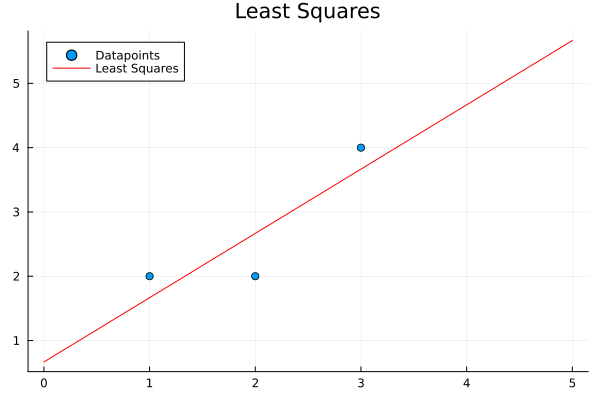

In [63]:
using Plots

x_axis = LinRange(0.0, 5.0, 20)
lsq = w_1 * collect(x_axis) .+ w_0 
p1 = plot(u, y, st=:scatter, title="Least Squares", label="Datapoints")
plot!(p1, x_axis, lsq, c=:red, label="Least Squares")

In [64]:
@assert isnan(w_0) == false "Your value for w_0 is NaN"

# please leave this cell as it is


In [65]:
@assert isnan(w_1) == false "Your value for w_1 is NaN"

# please leave this cell as it is


### Task 2: Parameter Estimation of the DC Motor - (5 points)

The electrical behaviour of the DC motor in steady state is characterized by the following static equation

$$
\begin{align}
    i_s = u_s \frac{1}{R_s} - \omega \frac{\Psi_E}{R_s}
\end{align}
$$

where $u_s$ is the voltage provided by a power supply, $\omega$ is the rotation speed which is set by a mechanical load machine, $R_s$ and $\Psi_E$ are unknown values and $i_s$ is the current that can be measured after the motor reached steady-state operation. For the whole task, you can assume that $u_s$ and $\omega$ are perfectly known, while the measured values for $i_s$ are affected by bias-free, additive, Gaussian noise.

**a)** Consider the system described above. Assign each of the equation components to the different elements of the least squares problem. For this, map each of the components in the cell below to one of the following classes: **- (0.5 points)**
- class **1**: Measurements $\boldsymbol{y}$
- class **2**: Regressors $\boldsymbol{z}$
- class **3**: Parameters $\boldsymbol{w}$ (this is the letter $\boldsymbol{w}$ for the parameter vector not to be confused with the greek symbol $\omega$ for the angular velocity)

In [70]:
# choose 1,2 or 3

class_i_s = 1
class_u_s = 2
class_one_over_R_s = 3  # i.e. 1/R_s
class_omega = 2
class_minus_Psi_E_over_R_s = 3  # i.e. - Psi_E/R_s

#--- YOUR CODE STARTS HERE ---#

#--- YOUR CODE ENDS HERE ---#

3

In [72]:
@assert 1 <= class_i_s <= 3  
@assert 1 <= class_u_s <= 3  
@assert 1 <= class_one_over_R_s <= 3  
@assert 1 <= class_omega <= 3  
@assert 1 <= class_minus_Psi_E_over_R_s <= 3  

# please leave this cell as it is


**b)** Implement the function below to calculate the parameters $\boldsymbol{w}$ from the regressor matrix $\boldsymbol{Z}$ and the measurement vector $\boldsymbol{y}$ using the ordinary least squares approach from the lecture. **- (1 point)**

**Hint**: This is not specific to the system at hand.

In [73]:
function parameter_calculation_OLS(Z, y)
    """
    Args:
        Z: regressor matrix with shape (n_measurements, n_regressors)
        y: measurement_vector with shape (n_measurements)
    
    Returns:
        The parameter vector w with shape (n_parameters)
    """
    
    #--- YOUR CODE STARTS HERE ---#
    w = inv(Z' * Z) * Z' * y
    #--- YOUR CODE ENDS HERE ---#
    return w
end;

In [74]:
@assert isa(parameter_calculation_OLS, Function)

# please leave this cell as it is


In [ ]:
# please leave this cell as it is


**c)** Use the function implemented in subtask b) and the given data for $u_s$, $\omega$ and $i_s$ to estimate values for $a = \frac{1}{R_s}$ and $b = -\frac{\Psi_E}{R_s}$. Put your results for $a$ and $b$ into the variables below. **- (1 point)**

In [ ]:
using MAT

data_task_2 = matopen("data_task_2.mat")

# read data
u_s = read(data_task_2, "u_s"); # 100 x 1
omega = read(data_task_2, "omega"); # 100 x 1
i_s = read(data_task_2, "i");

In [96]:
# variables for you to overwrite
a = NaN
b = NaN

#--- YOUR CODE STARTS HERE ---#
Z = cat(u_s, omega, dims=2)
w = parameter_calculation_OLS(Z, i_s)

a = w[1]
b = w[2]
#--- YOUR CODE ENDS HERE ---#

-0.043177661496966266

In [97]:
@assert isnan(a) == false "Your value for a is NaN"
@assert isnan(b) == false "Your value for b is NaN"

@assert a > 0 "The resistance must be positive by physical constraints, that is, 'a' must be positive"
@assert b < 0 "The resistance and the flux linkage must be positive, that is, 'b' must be negative"

# please leave this cell as it is


In [ ]:
# please leave this cell as it is


**d)** Implement a function to compute estimations for $R_s$ and $\Psi_E$ based on $a$ and $b$. **- (0.5 points)**

In [98]:
function compute_Rs_Psi_E(a, b)

    #--- YOUR CODE STARTS HERE ---#
    R_s = 1 / a
    Psi_E = b * (-R_s)
    #--- YOUR CODE ENDS HERE ---#

    return R_s, Psi_E
end;

In [ ]:
# please leave this cell as it is


**e)** Analyse the accuracy of your parameter estimates. For this, take into consideration that the measured values for $i_{s}$, that you loaded from the file, are affected by bias-free, additive, Gaussian noise:

$$
\begin{align}
i_{s} = i_{s, true} + \nu \quad \mathrm{with} \, \nu \sim \mathcal{N}(0, \sigma_n^2).
\end{align}
$$

i) Estimate the corrected sample variance of $\nu$ from the measurements for $i_s$, that you were given, and your estimate $\hat{i}_s$, that is based on the estimated parameters. **- (0.5 points)**

In [124]:
var_nu = NaN

#--- YOUR CODE STARTS HERE ---#
i_hats = w[1] * u_s + w[2] * omega  # predictions

# parameter initialization
N = 100
var_i_s = 0
var_i_hats = 0
mean_i_s = 0
mean_i_hats = 0

# calculate sample means
for i = 1:100
    mean_i_s += i_s[i]
    mean_i_hats += i_hats[i]

end
mean_i_s /= N
mean_i_hats /= N

# calculate sample variances (corrected)
for i = 1:100
    var_i_s += (i_s[i] - mean_i_s)^2
    var_i_hats += (i_hats[i] - mean_i_hats)^2

end
var_i_s /= (N - 1)
var_i_hats /= (N - 1)


# not sure which one to chose here, decided on the var for ̂  i_hat.
var_nu = var_i_hats
#--- YOUR CODE ENDS HERE ---#

156.14699388273493

In [127]:
@assert isnan(var_nu) == false "Your value for the variance of nu is not a number."
@assert var_nu > 0 "A variance is always positive."

# please leave this cell as it is


ii) Implement the function below to estimate the covariance matrix of the parameter vector $\boldsymbol{w}$ based on the noise variance $\sigma_n^2$ and the regressor matrix $\boldsymbol{Z}$ **- (0.5 points)**

In [128]:
function estimate_covariance_matrix(var_nu, Z)
    """
    Args:
        var_nu: variance of the noise process
        Z: regressor matrix with shape (n_measurements, n_regressors)

    Returns:
        covariance matrix of w
    """
    
    #--- YOUR CODE STARTS HERE ---#
    cov_w = var_nu * inv(Z' * Z)
    #--- YOUR CODE ENDS HERE ---#

    return cov_w
end;

In [ ]:
# please leave this cell as it is


iii) Evaluate the coefficient of determination for the regression problem (see https://en.wikipedia.org/wiki/Coefficient_of_determination). **- (1 point)**

$$
\begin{align}
    R^2 = 1 - \frac{\sum_i{(y_i - \hat{y}_i)^2}}{\sum_i{(y_i - \bar{y})^2}}
\end{align}
$$

In [130]:
R_squared = NaN  # put your solution into this variable

#--- YOUR CODE STARTS HERE ---#
num = 0
denom = 0
for i = 1:100
    num += (i_s[i] - i_hats[i])^2
    denom += (i_s[i] - mean_i_s)^2
end

R_squared = 1 - (num / denom)
#--- YOUR CODE ENDS HERE ---#

0.9827234782875744

In [131]:
@assert isnan(R_squared) == false "Your value for the coefficient of determination is not a number."

# please leave this cell as it is


### Task 3: Estimate Polynom Coefficients - (3 points)

The given data was produced using a polynomial of the form


$$
\begin{align}
    y = w_0 + x \cdot w_1 + \dots + x^p \cdot w_p
\end{align}
$$

with an unknown degree $p$.

Below you are given data for the inputs $x$ and the outputs $y$. On the one hand you are given training data you will use for the identification of coefficients (estimation of a model) and validation data
that is used to evaluate the generalization performance of your model. All of the data for the measurements $y$ is affected by bias-free, additive, Gaussian noise, i.e., the values you are given below do not fully follow the formula given above, but instead

$$
\begin{align}
    y = w_0 + x \cdot w_1 + \dots + x^p \cdot w_p + \nu \quad \mathrm{with} \, \nu \sim \mathcal{N}(0, \sigma_n^2).
\end{align}
$$

The variance of the noise process is unknown, but it is also not necessary to estimate it for completing this task.

In [132]:
using MAT
data_task_3 = matopen("data_task_3.mat");

In [133]:
# training data
x_training = read(data_task_3, "x_training")[1, :];
y_training = read(data_task_3, "y_training")[1, :];
 
# validation data
x_validation = read(data_task_3, "x_validation")[1, :];
y_validation = read(data_task_3, "y_validation")[1, :];

**a)** Consider the regression problem of the form:

$$
\begin{align}
    \boldsymbol{y} = \boldsymbol{Z} \cdot \boldsymbol{w}  + \boldsymbol{\nu}.
\end{align}
$$

Implement the function below to compute the regressor matrix $\boldsymbol{Z}$ for the polynom coefficient estimation problem described above. The function takes the input data $\boldsymbol{x}$ and the degree of the polynom $p$ as inputs. **- (0.5 points)**

**Example:** If $p=2$, we get a model until the 2nd polynomial degree

$$
\begin{align}
    y = w_0 + x \cdot w_1 + x^2 \cdot w_2
\end{align}
$$

which results in the regressor vector

$$
\begin{align}
    \boldsymbol{z} = \begin{bmatrix} 1 & x & x^2 \end{bmatrix}.
\end{align}
$$

With an input vector $\boldsymbol{x} = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}$ this results in the regressor matrix

$$
\begin{align}
    \boldsymbol{Z} = \begin{bmatrix}
        1 & 1 & 1 \\
        1 & 2 & 4 \\
        1 & 3 & 9 \\
    \end{bmatrix}.
\end{align}
$$



In [160]:
function regressor_matrix(x, p)
    """
    Args:
        x: Input data
        p: Degree of the polynomial
    
    Returns:
        Regressor matrix Z with shape (length(x), p+1)
    """
    
    #--- YOUR CODE STARTS HERE ---#
    Z = zeros(length(x), p+1)
    for i = 0:p
        Z[:,i+1] = x.^i
    end
    #--- YOUR CODE ENDS HERE ---#

    return Z
end

regressor_matrix (generic function with 1 method)

In [147]:
@assert isa(regressor_matrix, Function)

# please leave this cell as it is


In [ ]:
# please leave this cell as it is


**b)** Write the computation of the parameter estimation using OLS as a function of the input data $\boldsymbol{x}$, the output data $\boldsymbol{y}$ and the degree of the polynomial $p$. Your goal is to find the parameters $\boldsymbol{w}$ for the polynom of degree $p$. Use the function for the computation of the regression matrix that was asked for in subtask a) **- (0.5 points)**

In [163]:
function compute_parameter_estimation(x, y, p)
    """
    Args:
        x: Input data
        y: Output data
        p: Degree of the polynomial
    
    Returns:
        parameter vector w with shape (p+1)
    """
    
    #--- YOUR CODE STARTS HERE ---#
    Z = regressor_matrix(x, p)
    w = parameter_calculation_OLS(Z, y)
    #--- YOUR CODE ENDS HERE ---#

    return w
end

compute_parameter_estimation (generic function with 1 method)

In [ ]:
@assert isa(compute_parameter_estimation, Function)

# please leave this cell as it is


In [ ]:
# please leave this cell as it is


**c)** Your goal now is to find the fit onto the training data that best generalizes to the validation data. **- (2 points)**

For this:
- iterate over the degree of the polynomial $p$,
- find the parameter vector $\boldsymbol{w}_p$ based on the training data $\boldsymbol{x}_{training}$ and $\boldsymbol{y}_{training}$,
- compute the estimates $\hat{\boldsymbol{y}}$ using $\boldsymbol{w}_p$ and $\boldsymbol{x}_{validation}$, and
- compare the estimates $\hat{\boldsymbol{y}}$ with $\boldsymbol{y}_{validation}$ using the given error function.

In [148]:
function error_function(a, b)
    """Computes the error between the two input vectors."""

    @assert length(a) == length(b)
    @assert ndims(a) == ndims(b) == 1
    
    N = length(a)
    return sqrt(1/N * sum((a-b).^2))
end

error_function (generic function with 1 method)

Find a polynomial model with **an error below $10$** according to the steps described above and report its degree in the variable $p_{sol}$ below. 

**Hint 1:** $p_{sol} \in [0, 10]$

**Hint 2:** Multiple degrees for the polynomial produce an error that is low enough. 

In [194]:
p_sol = NaN

#--- YOUR CODE STARTS HERE ---#
for i = 0:10
    Z_val = regressor_matrix(x_validation, i)
    w = compute_parameter_estimation(x_training, y_training, i)
    w = reshape(w, (length(w), 1))
    y_hat =  Z_val * w
    error = error_function(y_validation, y_hat[:,1])
    if error < 10
        p_sol = i
        break
    end
end
print("A polynomial of degree ", p_sol, " achieves an error < 10")
#--- YOUR CODE ENDS HERE ---#

A polynomial of degree 3 achieves an error < 10

In [192]:
@assert isnan(p_sol) == false "Your value for the p_final is not a number."
@assert 0 <= p_sol <= 10

# please leave this cell as it is


**For the interested (no extra points or credit):** Plot the estimates of the model, the training data and the validation data for each value of $p \in [0, 10]$. Why is the highest degree of freedom not necessarily the best choice? What effect that you might know from the context of machine learning can be seen here?

Please remove your plotting commands from the notebook before submission. Thank you!